# Data cleaning

### Loading data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

### Changing to multi index with time and ID
We want to reformat the data such that we have a number of observations for each patient, with each observation consisting of some time period e.g one week. Each observation will have a measurement for each attribute (e.g., Avg time spent on weather app over period) with the dependent variable as the average mood over the period. 

In [57]:
#Import
data = pd.read_csv('dataset_mood_smartphone.csv')
print(len(data))

# Clea invalid responses
data = data.loc[(((data.value >= 1) & (data.value <= 10))|(data.variable != 'mood'))]
print(len(data))
data = data.loc[(((data.value >= -2) & (data.value <= 2))|(data.variable != 'circumplex.arousal'))]
print(len(data))
data = data.loc[(((data.value >= -2) & (data.value <= 2))|(data.variable != 'circumplex.valence'))]
print(len(data))
data = data.loc[(((data.value >= 0) & (data.value <= 1))|(data.variable != 'activity'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'screen'))]
print(len(data))
data = data.loc[(((data.value == 0) | (data.value == 1))|(data.variable != 'call'))]
print(len(data))
data = data.loc[(((data.value == 0) | (data.value == 1))|(data.variable != 'sms'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.communication'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.entertainment'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.finance'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.game'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.office'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.other'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.social'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.travel'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.unknown'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.utilities'))]
print(len(data))
data = data.loc[((data.value >= 0)|(data.variable != 'appCat.weather'))]
print(len(data))

376912
376912
376866
376710
376710
376710
376710
376710
376710
376709
376709
376709
376709
376709
376709
376709
376709
376709
376709


In [58]:
#Convert time column to date time format
data['time']= pd.to_datetime(data['time']) 
data = data.set_index(['id', 'time'])
data_formated = pd.pivot_table(data, index=['id', 'time'], columns='variable', values='value')

### Summing rows for each 3 hours.  

How are we classifying a day?  I would classify the start of the day as when the person wakes up.  Therefor, the average of the day would be fine, but we would need to do something about the overnight times....  Maybe by classifying them as whole days even though we only take 3 hour chunks, we can add a column for not only the day of the week but also for hours of sleep, and if it was uninterupted?  This could be done by checking when the last phone usuage is between the hours of 10-3 with at least a 3 hour gap between?  to find if it was uninterupted check to see if past this time and before the high use time again?

Alternativly commbine the two into a last used and first used for each day? and we can add a statement that if the time is lesss than 5 hours that sleep wasnt restful?



In [59]:
data_formated = data_formated.astype(float)
data3H = data_formated.groupby([pd.Grouper(level='id'), pd.Grouper(freq='3H', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

data3H

appCat.communication  appCat.entertainment  \
id      time                                                              
AS14.01 2014-02-17 12:00:00                 0.000                 0.000   
        2014-02-17 18:00:00                 0.000                 0.000   
        2014-02-18 09:00:00                 0.000                 0.000   
        2014-02-19 12:00:00                 0.000                 0.000   
        2014-02-19 15:00:00                 0.000                 0.000   
        2014-02-19 18:00:00                 0.000                 0.000   
        2014-02-19 21:00:00                 0.000                 0.000   
        2014-02-20 09:00:00                 0.000                 0.000   
        2014-02-20 12:00:00                 0.000                 0.000   
        2014-02-21 15:00:00                 0.000                 0.000   
        2014-02-22 15:00:00                 0.000                 0.000   
        2014-02-22 18:00:00                 0.000                 0.000   
        2014-02-22 21:00:00                 0.000                 0.000   
        2014-02-25 09:00:00                 0.000                 0.000   
        2014-02-25 12:00:00                 0.000                 0.000   
        2014-02-26 12:00:00                 0.000                 0.000   
        2014-02-26 15:00:00                 0.000                 0.000   
        2014-02-26 18:00:00                 0.000                 0.000   
        2014-02-26 21:00:00                 0.000                 0.000   
        2014-02-27 09:00:00                 0.000                 0.000   
        2014-02-27 12:00:00                 0.000                 0.000   
        2014-02-27 15:00:00                 0.000                 0.000   
        2014-02-28 18:00:00                 0.000                 0.000   
        2014-02-28 21:00:00                 0.000                 0.000   
        2014-03-01 09:00:00                 0.000                 0.000   
        2014-03-03 18:00:00                 0.000                 0.000   
        2014-03-05 21:00:00                 0.000                 0.000   
        2014-03-06 18:00:00                 0.000                 0.000   
        2014-03-07 12:00:00                 0.000                 0.000   
        2014-03-07 15:00:00                 0.000                 0.000   
...                                           ...                   ...   
AS14.33 2014-05-27 09:00:00               813.081                 0.000   
        2014-05-27 12:00:00                27.093                 0.000   
        2014-05-27 15:00:00               243.493                 0.000   
        2014-05-27 18:00:00                92.525                 0.000   
        2014-05-27 21:00:00               409.440               124.694   
        2014-05-28 00:00:00                 0.000                 0.000   
        2014-05-28 03:00:00                 0.000                 0.000   
        2014-05-28 06:00:00                 0.000                 0.000   
        2014-05-28 09:00:00               373.485               182.111   
        2014-05-28 12:00:00               499.250               225.138   
        2014-05-28 15:00:00               268.393                10.040   
        2014-05-28 18:00:00               422.122                78.483   
        2014-05-28 21:00:00               373.165               118.934   
        2014-05-29 00:00:00                18.070                 0.000   
        2014-05-29 03:00:00                 0.000                 0.000   
        2014-05-29 06:00:00                 0.000                 0.000   
        2014-05-29 09:00:00               236.993               131.720   
        2014-05-29 12:00:00                87.516                 0.000   
        2014-05-29 15:00:00                92.526                 5.018   
        2014-05-29 18:00:00                 0.000                 0.000   
        2014-05-29 21:00:00                 0.000     

In [96]:
data1D =  data_formated.groupby([pd.Grouper(level='id'), pd.Grouper(freq='1D', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

mood_daily = data1D['mood']
mood_only = pd.DataFrame(mood_daily.dropna())

In [115]:
mood_only.loc[('AS14.03')]

,mood
time,
2014-03-21,9.000000
2014-03-22,7.800000
2014-03-23,8.200000
2014-03-24,7.800000
2014-03-25,7.800000
2014-03-26,8.250000
2014-03-27,7.750000
2014-03-28,8.000000
2014-03-29,8.600000


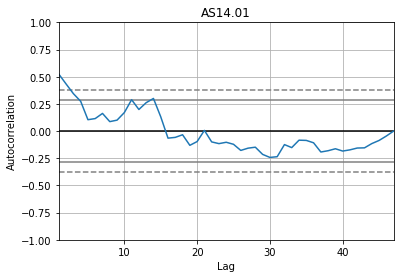

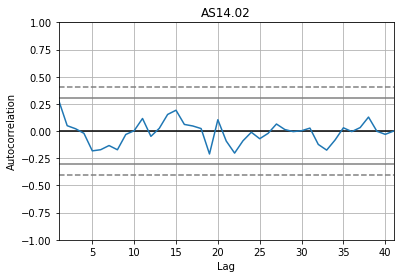

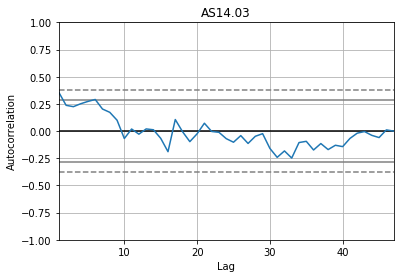

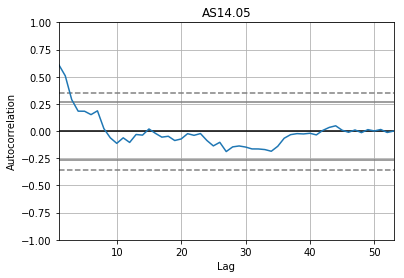

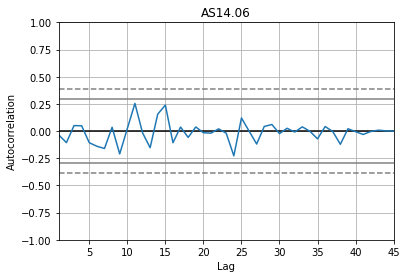

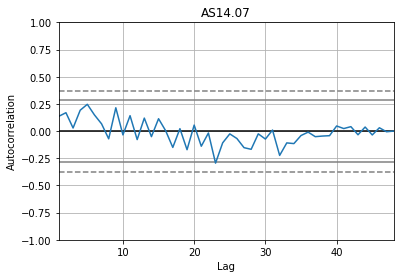

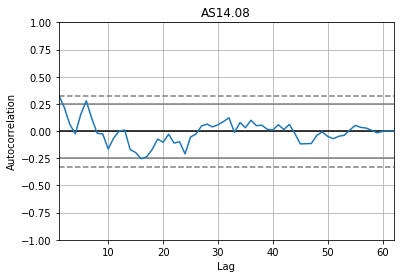

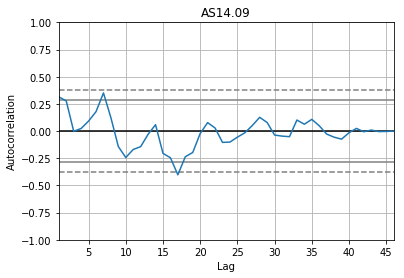

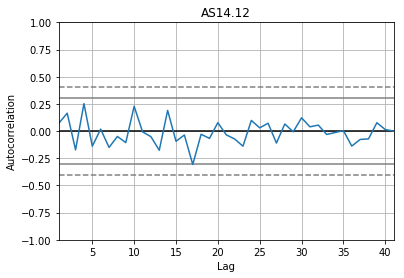

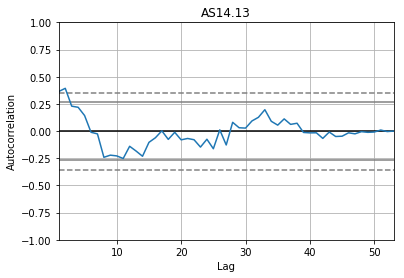

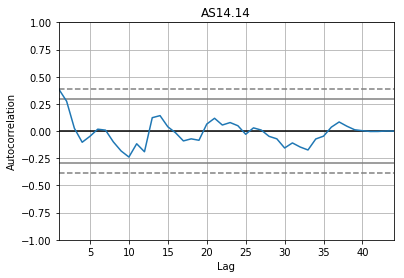

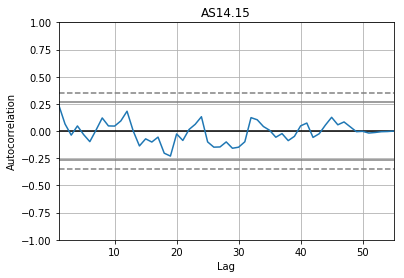

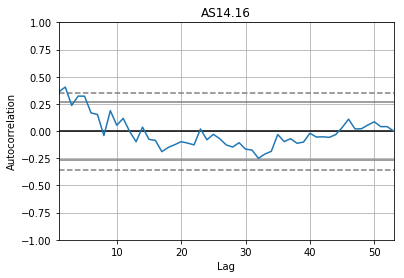

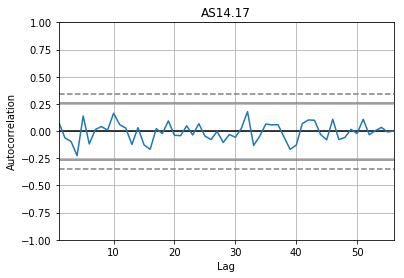

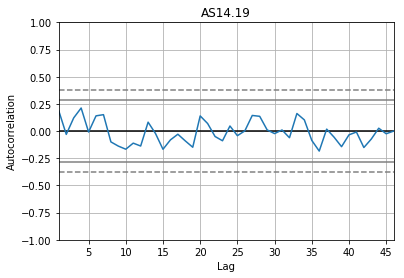

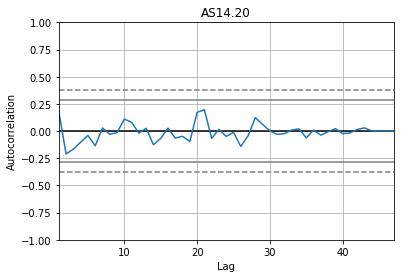

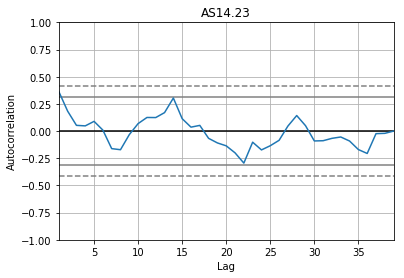

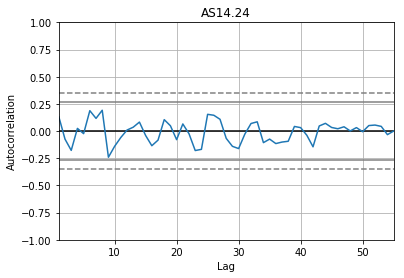

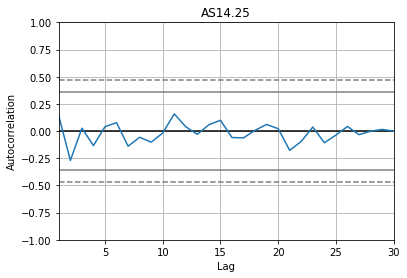

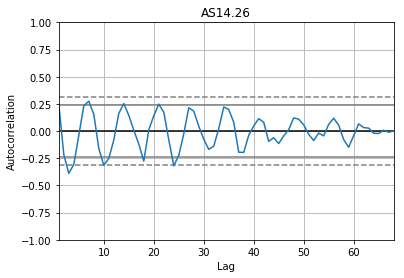

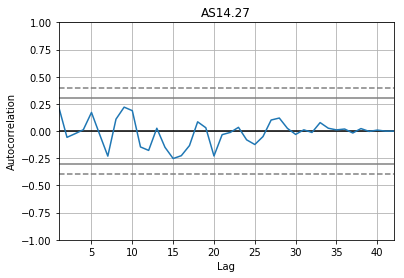

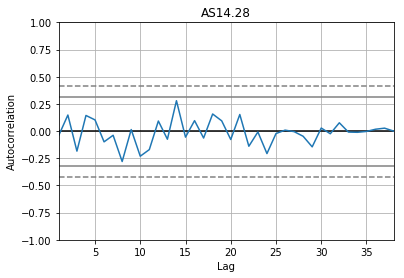

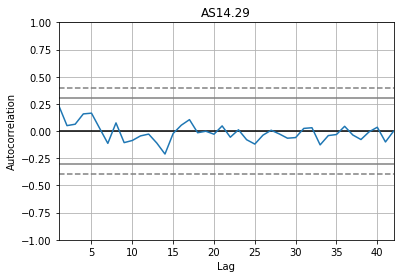

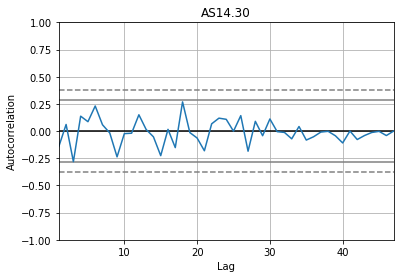

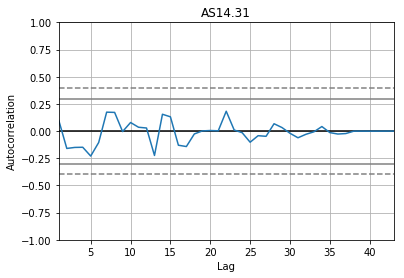

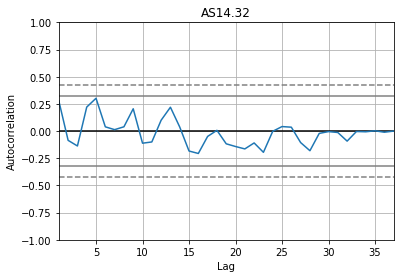

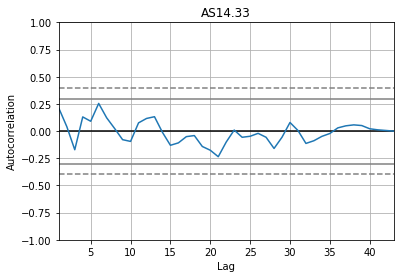

In [122]:
from pandas.plotting import autocorrelation_plot

#mood_only.plot.line()

#autocorrelation_plot(mood_only.loc[(index)])

for index in mood_only.index.levels[0].tolist():
    #mood_only.loc[(index)].plot.line()
    plt.figure()
    autocorrelation_plot(mood_only.loc[(index)])
    plt.title(index)
    
#mood_only.loc[(['AS14.01']),:].plot.line()

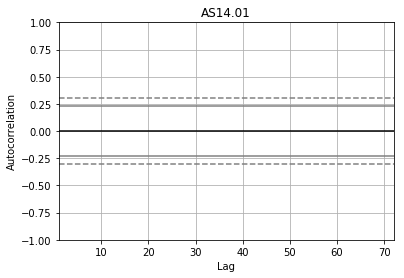

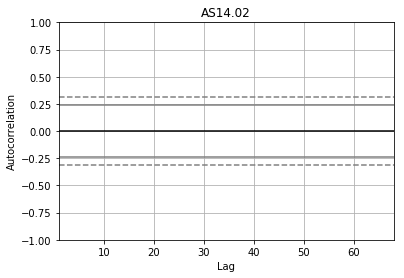

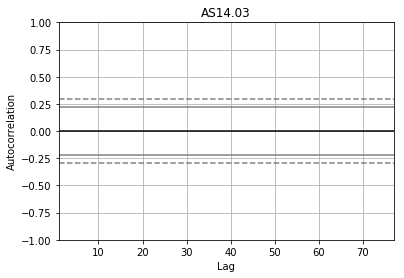

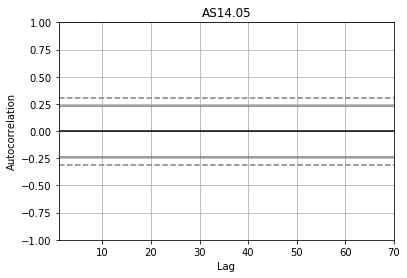

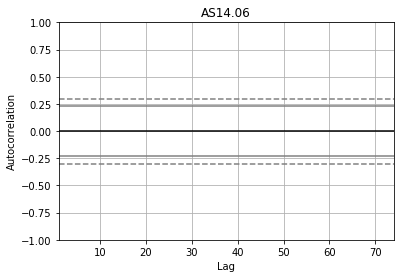

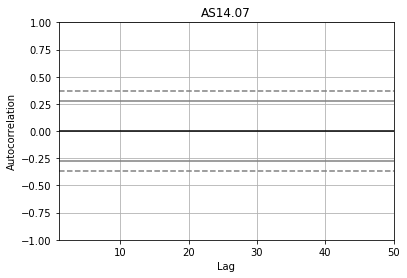

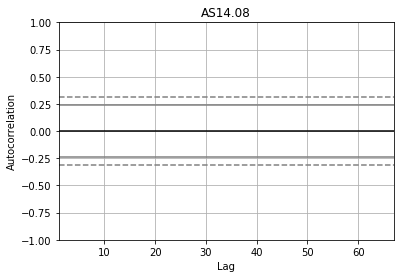

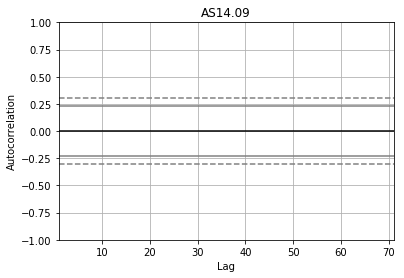

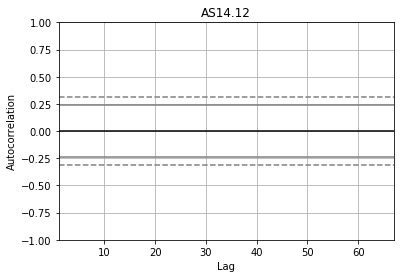

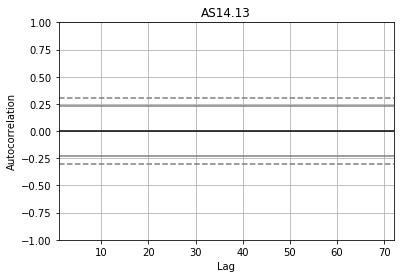

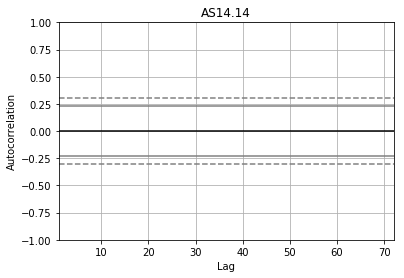

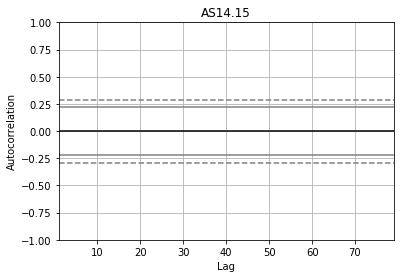

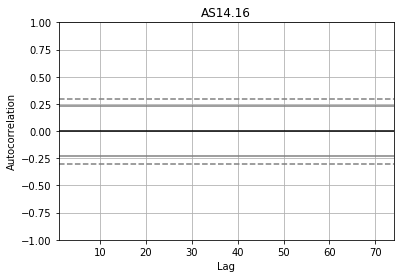

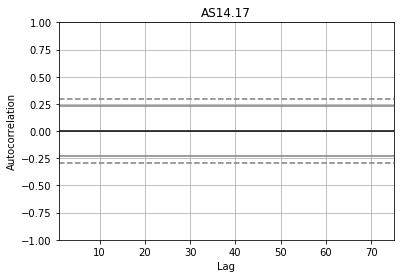

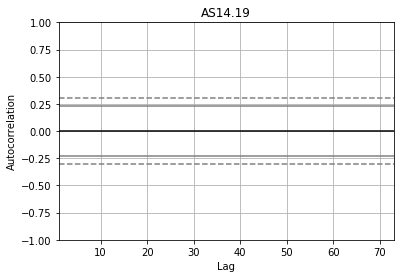

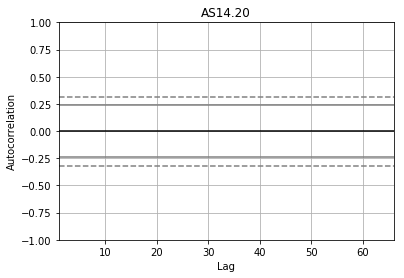

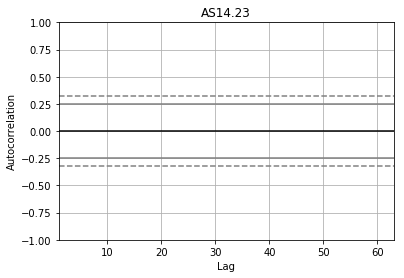

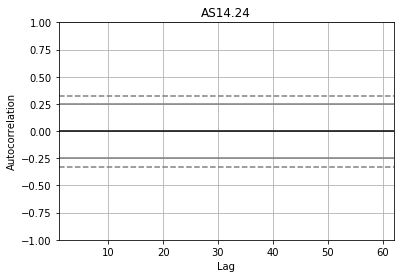

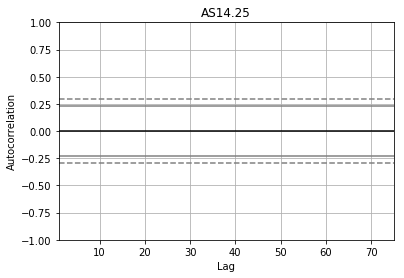

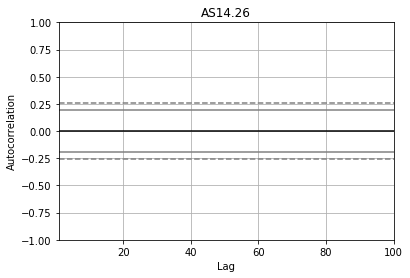

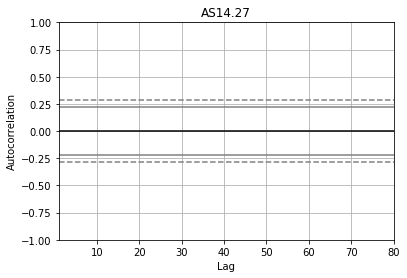

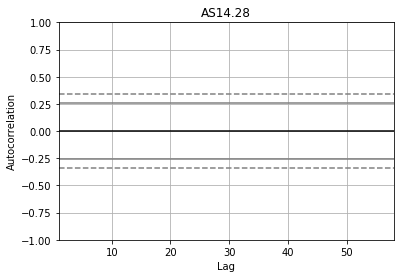

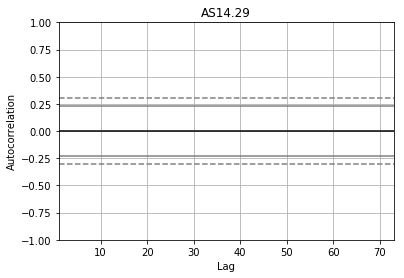

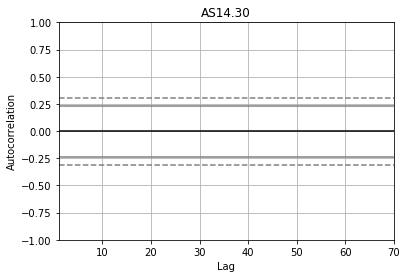

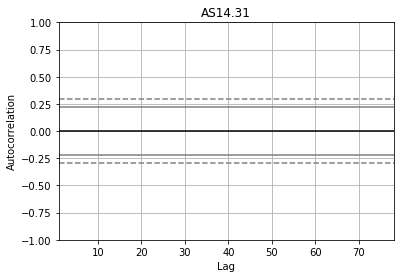

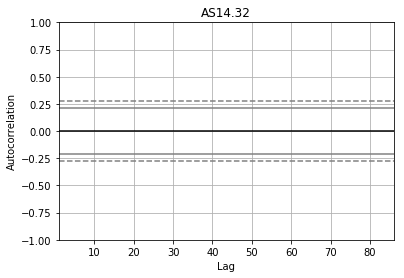

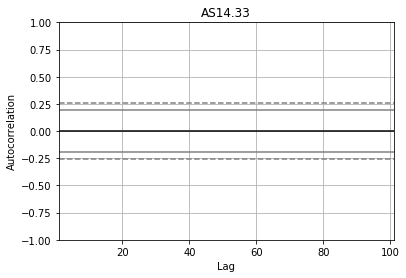

In [124]:
for index in data1D.index.levels[0].tolist():
    #mood_only.loc[(index)].plot.line()
    plt.figure()
    autocorrelation_plot(data1D.loc[(index)])
    plt.title(index)

                             ARIMA Model Results                              
Dep. Variable:                 D.mood   No. Observations:                   52
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -54.972
Method:                       css-mle   S.D. of innovations              0.696
Date:                Thu, 18 Apr 2019   AIC                            117.943
Time:                        00:11:55   BIC                            125.748
Sample:                    03-15-2014   HQIC                           120.936
                         - 05-05-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0222      0.077     -0.287      0.775      -0.174       0.129
ar.L1.D.mood    -0.3172      0.147     -2.161      0.036      -0.605      -0.030
ar.L2.D.mood     0.0626      0.146      0.42

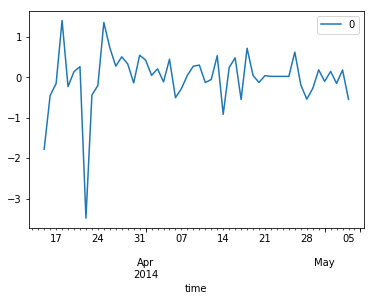

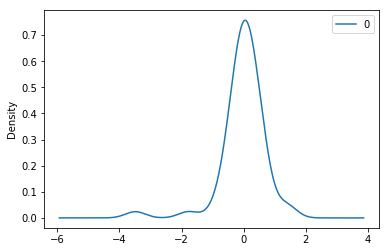

               0
count  52.000000
mean   -0.009617
std     0.707477
min    -3.484468
25%    -0.185596
50%     0.037225
75%     0.287989
max     1.413749


In [132]:
from statsmodels.tsa.arima_model import ARIMA
series = mood_only.loc[('AS14.05')]
# fit model
model = ARIMA(series, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
#Make copy of data
data3 = copy.deepcopy(data2)

#Setup new frame
df = pd.DataFrame(columns=data3.columns)

df.insert(0,'date', "")
df.insert(0,'id', "")
df_lost = copy.deepcopy(df)

prev_id = data3.index[0][0]
i_prev = 0
ave_list = ['circumplex.arousal', 'mood', 'circumplex.valence']

tmp = []
for i in range(0, len(data3)):
    #print(i)
    if data3.index[i][0] != prev_id or data3.index[i_prev][1] != data3.index[i][1]:
        for k in range(i_prev, i):
            tmp.append(data3.index[i_prev][0])
            tmp.append(data3.index[k][1])
            for j in range(0, len(data3.columns)):
                tmp.append(data3.iloc[k,j])
            #print(len(tmp))
            df_lost.loc[len(df_lost)] = tmp
            tmp = []
        i_prev = i
        prev_id = data3.index[i][0]
    if not pd.isnull(data3['mood'].iloc[i]):
        tmp.append(data3.index[i_prev][0])
        tmp.append(data3.index[i][1])
        for j in range(0, len(data3.columns)):
            if any(data3.columns[j] in s for s in ave_list):
                tmp.append(data3.iloc[i_prev:i+1,j].mean())
            else:
                tmp.append(data3.iloc[i_prev:i+1,j].sum())
        df.loc[len(df)] = tmp
        tmp = []
        i_prev = i+1
print("done")

In [116]:
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_days = copy.deepcopy(df)

for name in names:
    df_days[name] = 0
    for i in range(0, len(df_test)):
        if df_test.loc[i,'date'].weekday() == names.index(name):
            df_test.loc[i, name] = 1
    
df_days.head()

NameError: name 'df_test' is not defined

In [ ]:
# Reorder so mood is at the end
cols = df_days.columns.tolist()
cols.remove('mood')
cols.append('mood')
df_days_reordered = df_days[cols]

### Aggregating the data into time windows 

For all of the apps, sms and calls we take the sum over the windows, since they are either times spent or number of calls etc. For arousal, mood and valence we take the mean.

In [4]:
prev_index = 0
for row in data2:
    
    if data2.iloc[[0]]['mood'] > 0:
        


IndentationError: expected an indented block (<ipython-input-4-e3b4070e974f>, line 5)

In [5]:
#This is currently grouping observations into 2 day windows, can make a decision on this later

data2 = data2.astype(float)
data2 = data2.groupby([pd.Grouper(level='id'), pd.Grouper(freq='2D', level='time') 
                             ]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

### Removing observations/days without mood measurements

In [6]:
data2 = data2.dropna(subset=['mood'])

### Dropping columns with little data

In [6]:
data2 = data2.drop(columns=['appCat.finance','appCat.game', 'appCat.unknown', 'appCat.weather'])

### Remove outliers

It is clear from the plots that there are some outliers that are nonsensical. No values should be negative apart from those for arousal or valence, which have a minimum value of -2. Therefore a good starting point is to remove any values which are less than that for the whole dataframe.

In [7]:
from scipy import stats

data2 = data2.astype(float)
data2 = data2[(np.abs(stats.zscore(data2)) < 4).all(axis=1)]

### Instead aggregating data into windows up to each mood measurement 

In [ ]:
test = data2.groupby(['id', 'time', 'mood'])

test.head()

In [ ]:
#This will give us more observations that grouping by day

data2 = data2.groupby([pd.Grouper(freq='1D', level='time'), 
                             pd.Grouper(level='id')]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

# Exploration

### Mood distribution 

In [ ]:
#We can now look at the distributions for each variable
data2.hist('mood')

### Observation counts for each day

In [ ]:
#This tells us the number of individuals for which we have mood data for each day in the dataset
data2.groupby(level=0)['mood'].count()

It is clear that there is a narrow time period over which we have data for all patients simulatneously. We cannot do much with days for which we little or no mood data, therefore we could consider discarding data in the early and late periods.

### Observation counts for each patient 

In [ ]:
#This tells us the number of mood observations for each individual
data2.groupby(level=1)['mood'].count()

### Counts for each variable, for each patient

In [ ]:
#Number of available instances for each variable, for each patient
data2.groupby(level=1).count()

There are a number of attributes for which we have few or no measurements for many of the patients, namely: Finance, Games, office, unknown, and weather. In some of these cases they may be entirely useless, especially if they happen to be highly correlated with other variables. We could consider taking binary indicators for some of these, with the intuition that if they check finance or office apps they have assets or a job, if they check the weather app they go outside, if they play mobile games they procrastinate etc

### Pairwise plots

Looking at the number of non-zero observations in each column after the above transformations

In [ ]:
import seaborn as sns

sns.pairplot(data2.loc[:,data2.dtypes == 'float64'])

### Correlation between predictors

In [ ]:
corr_matrix = data2.corr()
corr_matrix['mood']

# Feature engineering

Here we need to create new variables to improve our predictive power

Ideas so far:
- Days of week, month of recording
- Mood swing in last week
- Mornging/evening
- Binary indicators for some ommitted apps

In the paper on this dataset they say that basically none of the apps have any predictive power - once we show this 
#ourselves we could simplify the model down immensely using principle components/ indicators for 
"uses phone a lot-or not" 

### Day of week indicators

In [8]:
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, x in enumerate(names):
    data2[x] = (data2.index.get_level_values(1).weekday == i).astype(int)
    
data2.head()


activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-02-25  0.000000           0.000                 0.000   
        2014-02-27  0.000000           0.000                 0.000   
        2014-03-21  6.873236        3870.647             11243.808   
        2014-03-23  4.036182        2153.202             14507.948   
        2014-03-25  4.792378        2200.265             19265.504   

                    appCat.entertainment  appCat.office  appCat.other  \
id      time                                                            
AS14.01 2014-02-25                 0.000          0.000         0.000   
        2014-02-27                 0.000          0.000         0.000   
        2014-03-21              1100.780        172.206       337.894   
        2014-03-23              1071.317          3.010       139.381   
        2014-03-25               978.685          0.000       276.317   

                    appCat.social  appCat.travel  appCat.utilities  call  ...  \
id      time                                                              ...   
AS14.01 2014-02-25          0.000          0.000             0.000   4.0  ...   
        2014-02-27          0.000          0.000             0.000   4.0  ...   
        2014-03-21       4948.132        952.750           716.375   9.0  ...   
        2014-03-23       4124.465        419.805           208.818  10.0  ...   
        2014-03-25       6511.530          0.000           256.258   0.0  ...   

                    circumplex.valence  circumplex.arousal      mood  Monday  \
id      time                                                                   
AS14.01 2014-02-25            0.750000           -0.250000  6.250000       0   
        2014-02-27            0.333333            0.000000  6.333333       0   
        2014-03-21            0.333333            0.400000  6.300000       0   
        2014-03-23            0.400000            0.500000  6.400000       0   
        2014-03-25            0.555556            0.111111  6.666667       0   

                    Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  
id      time                                                                
AS14.01 2014-02-25        1          0         0       0         0       0  
        2014-02-27        0          0         1       0         0       0  
        2014-03-21        0          0         0       1         0       0  
        2014-03-23        0          0         0       0         0       1  
        2014-03-25        1          0         0       0         0       0  

[5 rows x 22 columns]

### Month indicators

In [9]:
names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, x in enumerate(names):
    data2[x] = (data2.index.get_level_values(1).month == i-1).astype(int)
    
data2.head()

activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-02-25  0.000000           0.000                 0.000   
        2014-02-27  0.000000           0.000                 0.000   
        2014-03-21  6.873236        3870.647             11243.808   
        2014-03-23  4.036182        2153.202             14507.948   
        2014-03-25  4.792378        2200.265             19265.504   

                    appCat.entertainment  appCat.office  appCat.other  \
id      time                                                            
AS14.01 2014-02-25                 0.000          0.000         0.000   
        2014-02-27                 0.000          0.000         0.000   
        2014-03-21              1100.780        172.206       337.894   
        2014-03-23              1071.317          3.010       139.381   
        2014-03-25               978.685          0.000       276.317   

                    appCat.social  appCat.travel  appCat.utilities  call  ...  \
id      time                                                              ...   
AS14.01 2014-02-25          0.000          0.000             0.000   4.0  ...   
        2014-02-27          0.000          0.000             0.000   4.0  ...   
        2014-03-21       4948.132        952.750           716.375   9.0  ...   
        2014-03-23       4124.465        419.805           208.818  10.0  ...   
        2014-03-25       6511.530          0.000           256.258   0.0  ...   

                    March  April  May  June  July  August  September  October  \
id      time                                                                    
AS14.01 2014-02-25      0      1    0     0     0       0          0        0   
        2014-02-27      0      1    0     0     0       0          0        0   
        2014-03-21      0      0    1     0     0       0          0        0   
        2014-03-23      0      0    1     0     0       0          0        0   
        2014-03-25      0      0    1     0     0       0          0        0   

                    November  December  
id      time                            
AS14.01 2014-02-25         0         0  
        2014-02-27         0         0  
        2014-03-21         0         0  
        2014-03-23         0         0  
        2014-03-25         0         0  

[5 rows x 34 columns]

### Mood swing indicator

# OLS as first test of feature importance

In [ ]:
olsdata = data2.groupby([pd.Grouper(freq='6M', level='time'), 
                             pd.Grouper(level='id')]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})
olsdata.head()

# Principle component Analysis

It's very probable that many of the apps serve similar purposes for the user and therefore may have a similar effect - a PCA could possibly decompose these features into a smaller subset representing e.g. A need for socializing (Messneger apps), boredom (News, finance)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Before we can run PCA we need to standarize all of the features

features = ['activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 
            'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 
            'appCat.weather', 'call', 'screen', 'sms', 'circumplex.valence', 'circumplex.arousal']
x = data2.loc[:, features].values
x = StandardScaler().fit_transform(x)

y = data2.loc[:,['mood']].values

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf.head()

In [ ]:
finalDf = pd.concat([principalDf, data2[['mood']]], axis = 1)

# Mean model

# Linear regression for aggregated data

For this wouldnt we just expect a linear relationship between valence and the mood?  How would this be trained then?  It would just be looking at the moods we have in the frames we have with a value for 

In [ ]:
from scipy import stats
import random

x_all = data2['circumplex.valence']
y_all = data2['mood']

ran_selection = [random.randint(0,len(x_all)) for i in range(0, len(x_all))]

uniq_selection = list(sorted(set(ran_selection)))

training_x = []
training_y = []

test_x = []
test_y = []

for i in range(0, len(x_all)):
    if i in uniq_selection:
        training_x.append(x_all[i])
        training_y.append(y_all[i])
    else:
        test_x.append(x_all[i])
        test_y.append(y_all[i])        

slope, intercept, r_value, p_value, std_err = stats.linregress(training_x,training_y)

# to test against the trained

pred_y = []

for x in test_x:
    pred_y.append((slope*x) + intercept)

y = np.array(test_y)
y_pred = np.array(pred_y)
mse = np.mean((y - y_pred)**2)

# Decision Tree/Random forrest

# Individual models (ARIMA?)